# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Read the data
df = pd.read_csv("C:/Users/HUAWEI/Documents/greatlearning/project/foodhub_order.csv")
# The first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Check the shape of the dataset
df.shape 

(1898, 9)

#### Observations:
The data consists of 1898 rows and columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

#### Observations:


In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data types for each column

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# missing values in the data
df.isnull().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# The summary statistics of the numerical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The best selling restaurant, Shake Shack, and the most exotic dish is American food

Average order cost is 16.50

Weekend orders are better than weekdays

The average order preparation time is 24 minutes

Average delivery time is 24 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
For non-rated applications 736

Most of them were rated at 5 with 588

And 4 with the number 386

And 3 with a number of 188

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [8]:
# Order ID
# The number of unique order ID
df['order_id'].nunique()  

1898

In [9]:
# Customer ID
# The number of unique customer ID
df['customer_id'].nunique()

1200

In [10]:
# Restaurant name
# The number of unique Restaurant Name
df['restaurant_name'].nunique()

178

In [11]:
# Cuisine type
# The number of unique cuisine type
df['cuisine_type'].nunique()

14

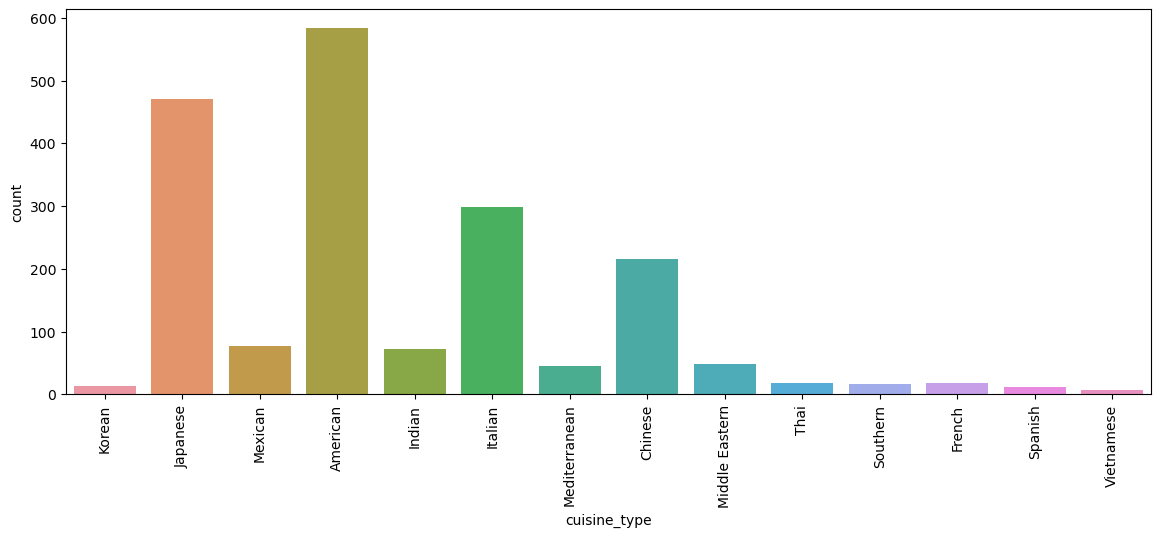

In [16]:
# The countplot for cuisine type.
plt.figure(figsize = (14,5))
sns.countplot(data = df, x = 'cuisine_type');
plt.xticks(rotation = 90);

#### Observations:

The highest frequency of orders for the American cuisine is approximately 590

Then the Japanese with approximately 480

The two least requested dishes are Korean and Vietnamese

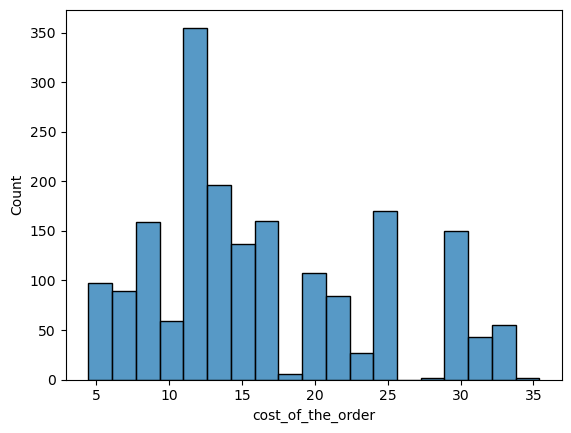

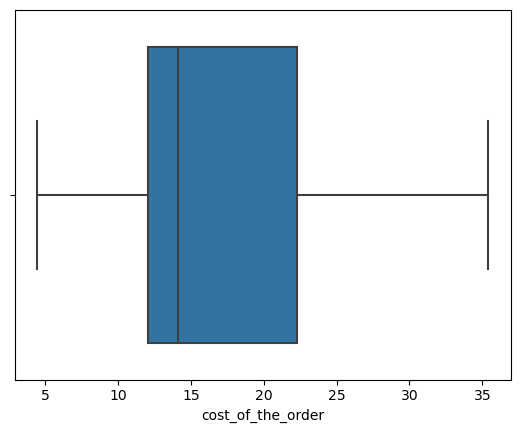

In [17]:
# Cost of the order
# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order') 
plt.show()
# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show() 

#### Observations:

Most meals cost approximately $ 12 with count 350

Most costs are less than $22,the highest cost is $35 and the lowest is $5

the values for day_of_the_week column is  2


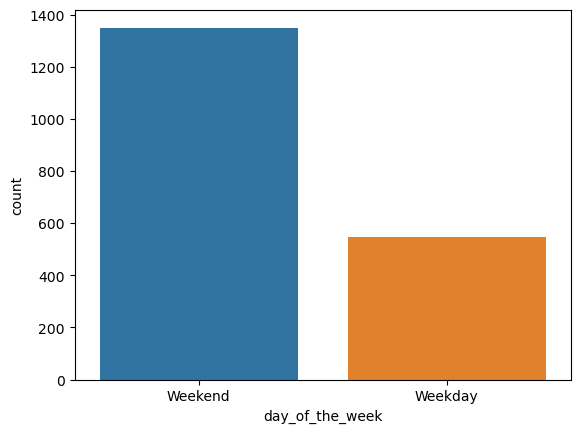

In [21]:
# Day of the week
print(" The values for day_of_the_week column is ", df['day_of_the_week'].nunique())
sns.countplot(data = df, x = 'day_of_the_week');

#### observations:

The number of orders on weekends increases to approximately 1,350 compared to weekdays which is approximately 500.

 The uniques values for rating column is : 4


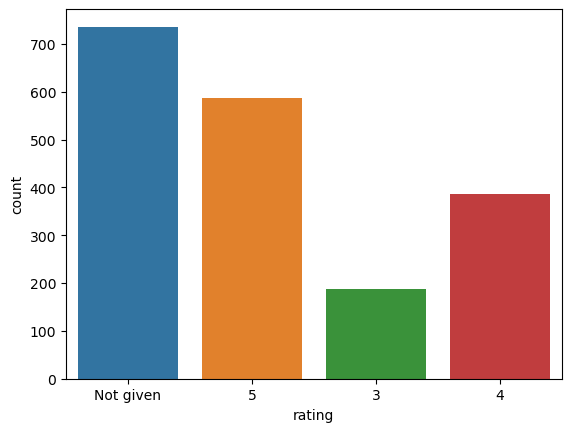

In [22]:
# Rating
print(" The uniques values for rating column is :" ,df['rating'].nunique()) 
sns.countplot(data = df, x = "rating");

#### Observations:

Most requests are not rated with count of 730 

Most of the restaurants got 5 with 590 reviews

There were 4 with 400

Then 3 is 180

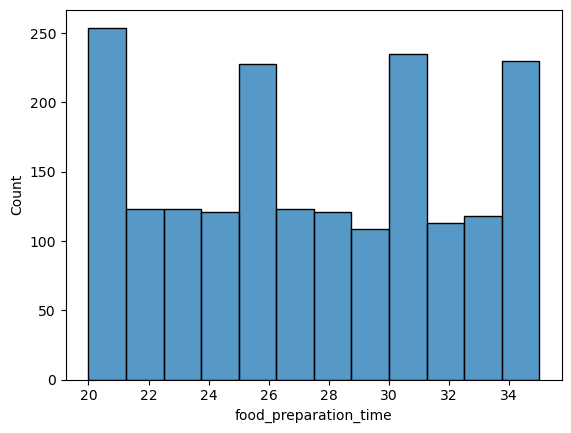

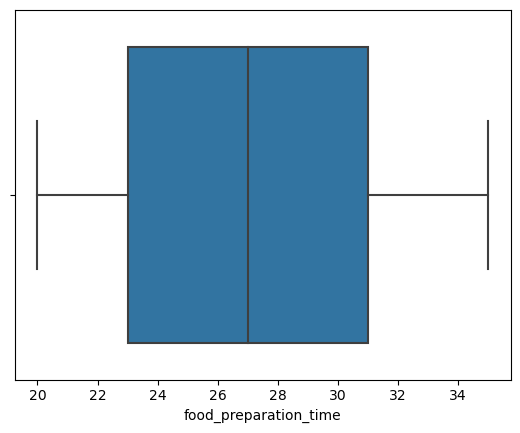

In [23]:
# Food Preparation time
sns.histplot(data=df,x="food_preparation_time") 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

#### Observations:

The average of preparation time is 27 minutes

Most Orders take between 23 and 31 minutes to prepare

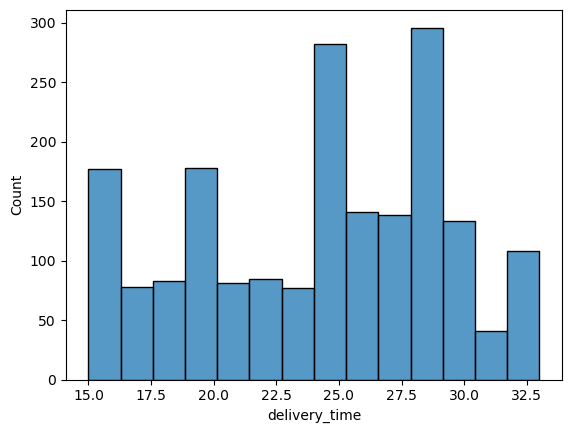

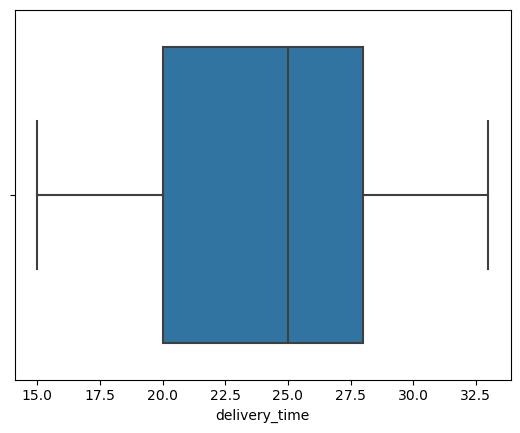

In [24]:
# Delivery time
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

#### Observations:

Most orders take 28.50 minutes to complete

Delivery time ranges between 15 and 33 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
df["restaurant_name"].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

These are the top 5 restaurants

shake shack is on the top



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# assign new variable equals to weekend  
df_weekend = df[df['day_of_the_week'] == 'Weekend']
# count values for the cuisine type on weekend
print(df_weekend['cuisine_type'].value_counts()) 


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations:
The most ordered dishes during the weekend out of 14 cuisine type are American 415, Japanese 355, then Italian 208, and the least is Vietnamese.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
# The orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# The number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# The percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
The numbers of orders cost more than $ 20 is 555, with a ratio of 29.24% 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# Get the mean delivery time

mean_del_time = df['delivery_time'].mean()  

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:
The mean of delivery time is 25.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
 Customers ID who received a 20% discount for the most frequent orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


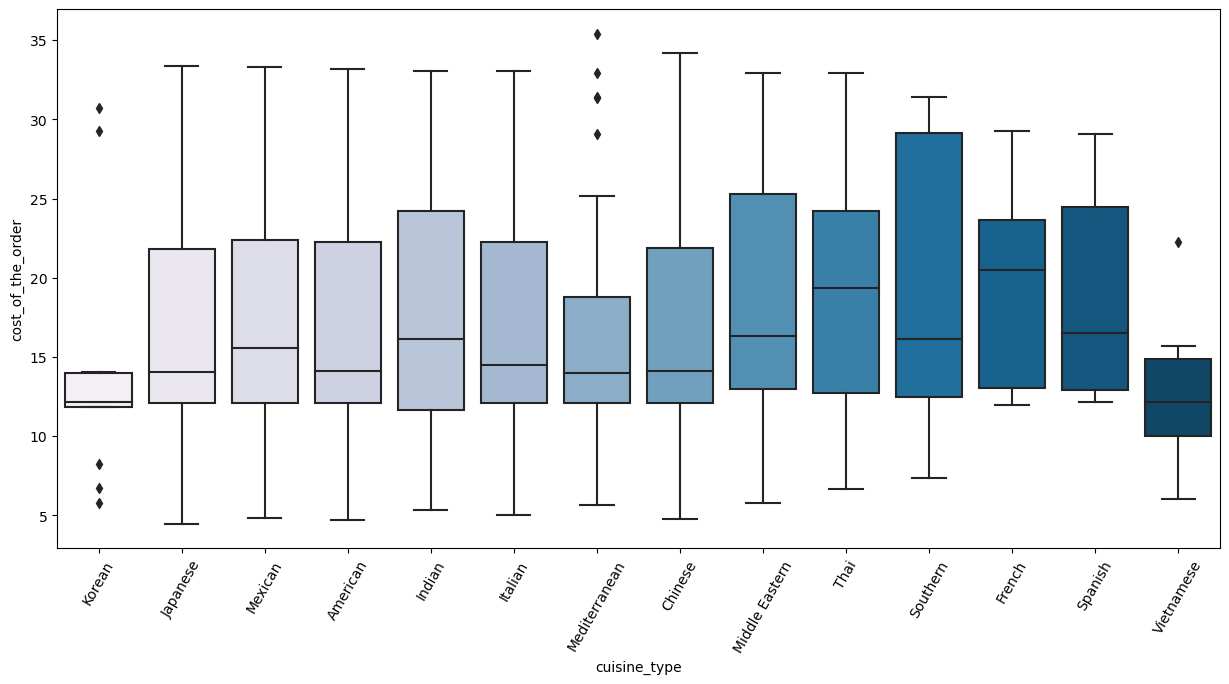

In [30]:
# Cuisine vs Cost of the order
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

At highest cost goes to mediterranan reach to $ 35 

The average cost of meals is between $ 12 and $ 20

The average cost of the most popular American dish is 15 dollars

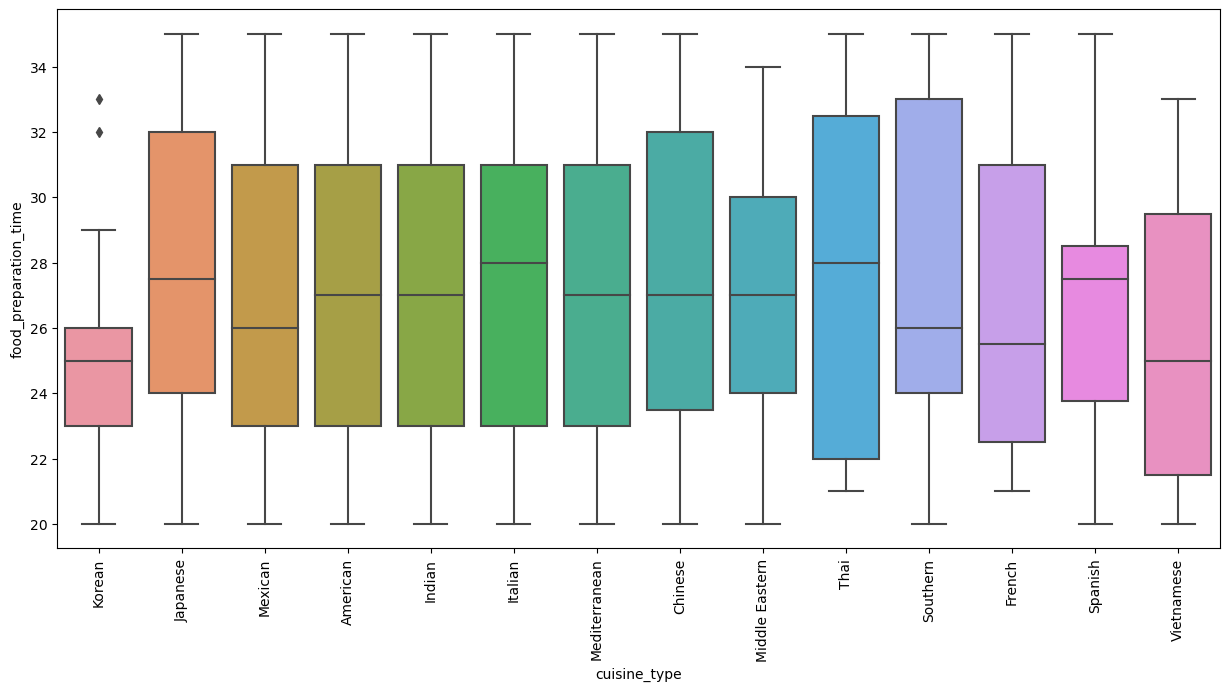

In [32]:
# Cuisine vs Food Preparation time
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)  
plt.xticks(rotation = 90)
plt.show()

#### Observations:

The average preparation time for the dish is 25 to 28 minutes

Ordering American meals requires an average preparation time of 27 minutes

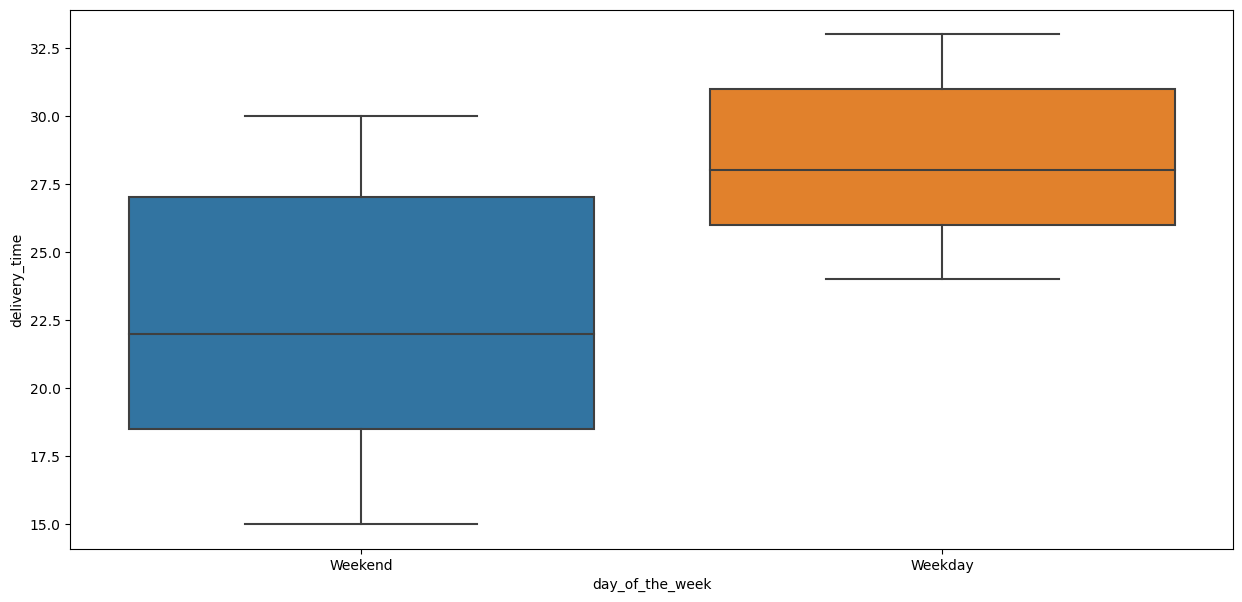

In [33]:
# Day of the Week vs Delivery time
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week",y="delivery_time",data=df) 
plt.show()

#### Observations:

Delivery time on the weekday takes longer, with an average of 6 minutes

In [34]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observations:

The restaurant’s revenue from delivering orders through the application

The highest is shake shack, $3,579.53


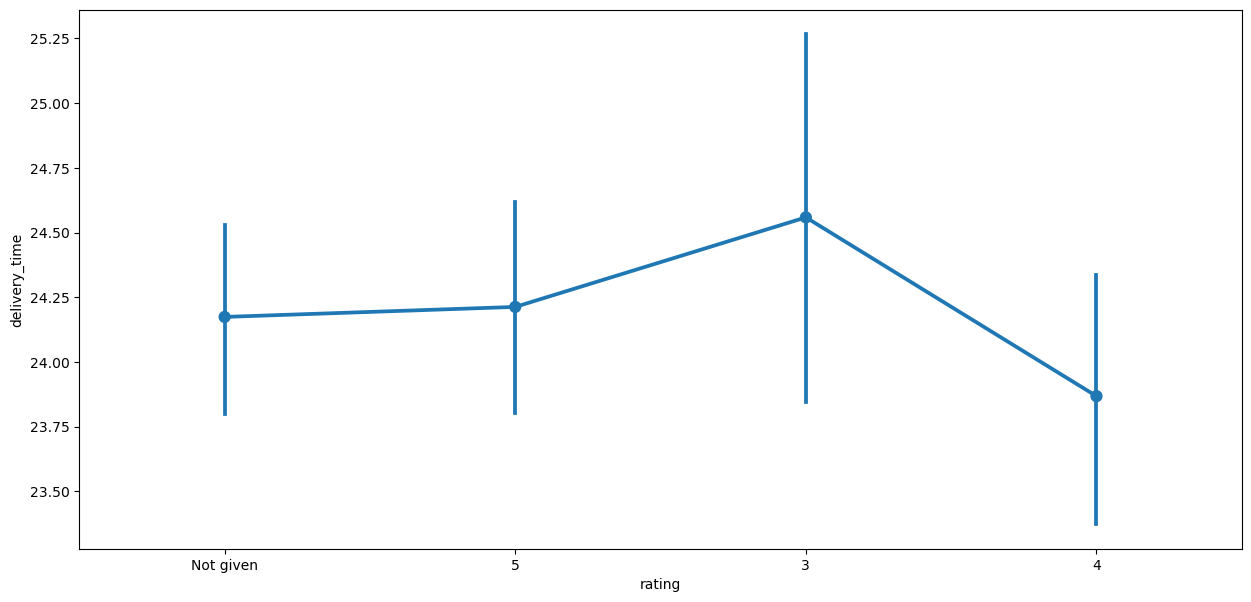

In [35]:
# Rating vs Delivery time
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:
in my opinion there is no relationship between rating and delivery time

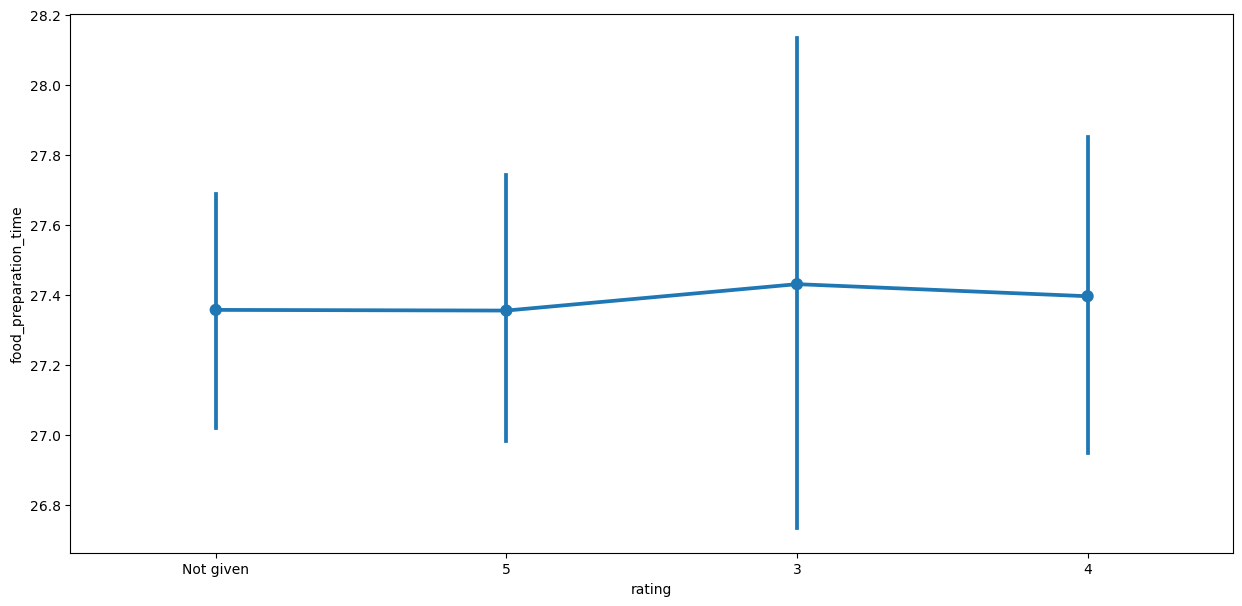

In [36]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating",y="food_preparation_time",data=df) 
plt.show()

#### Observations:
in my opinion there is no relationship between rating and food preparation time

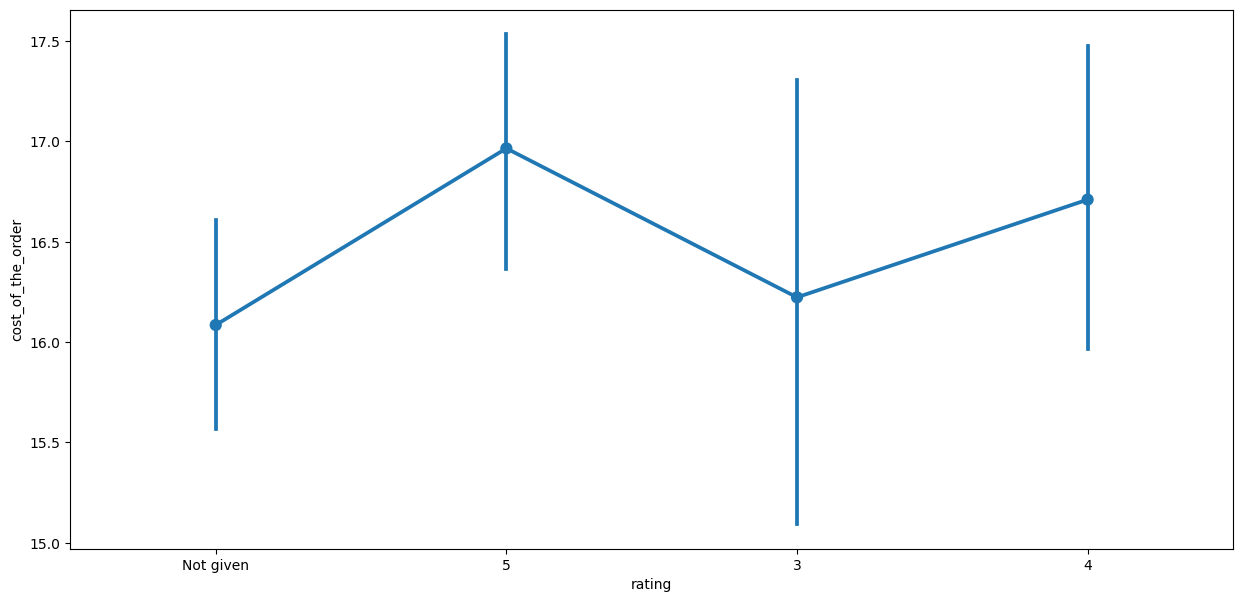

In [37]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x="rating",y="cost_of_the_order",data=df)  
plt.show()

#### Observations:

The average cost of restaurants rated at 5 is 17 dollars

The average cost of restaurants rated at 4 is 16.75 and 3 is 16.25

 Most of the  restaurants are not rated cost $ 16

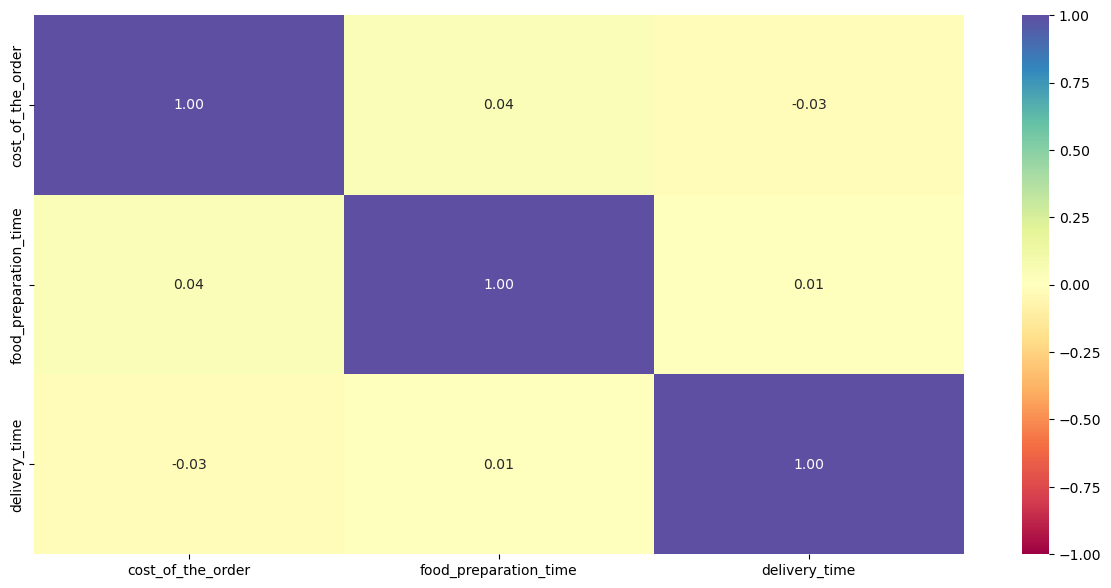

In [39]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation 
in my opinion there are no relationship between cost_of_the_order', 'food_preparation_time', 'delivery_time'

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [47]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
print(' Dataframe that contains the restaurant names with their rating counts is:\n ',df_rating_count )

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count["rating"]>50]['restaurant_name'] 

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

 Dataframe that contains the restaurant names with their rating counts is:
                 restaurant_name  rating
0                  Shake Shack     133
1            The Meatball Shop      84
2            Blue Ribbon Sushi      73
3    Blue Ribbon Fried Chicken      64
4             RedFarm Broadway      41
..                         ...     ...
151           Frank Restaurant       1
152        Socarrat Paella Bar       1
153            El Parador Cafe       1
154               Lucky Strike       1
155                 'wichcraft       1

[156 rows x 2 columns]


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Meatball shop has the highest rating 4.51

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# define function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# add new column to dataframe to calculate the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 

# get the total revenue and print it
total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

Total revenues 6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# the percentage of orders that have more than 60 minutes of total delivery time 

df_greater_than_60 = df[df['total_time']>60]
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of total time above 60 minutes:", round(percentage, 2), '%')



Percentage of total time above 60 minutes: 10.54 %


#### Observations:
Percentage of total time above 60 minutes: 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

#### Observations:

The average delivery time during the week is 28 minutes

And on weekend 22 min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

- Many orders by 39 % are not rated, which affects restaurants'rating and assessing customer desires in the type of food

- Most of the orders were during the weekends.

- The average of the cost of orders were 17 dollars and 27 % from the orders cost more than 20 dollars and the company commission is 25 % per order
- The average of cost of orders is 15  means that most of the customers serach for these price and need average food preparation time 27 minutes and average delivery time 24 minutes 
- Most frequent order for the customer is 13 
- Most of the orders were for american,italian,japanese,chinese , and highest demand was during the weekend , and it needs 22 min and 28 during the weekdays
- The highest restaurant had orders was shake shack 
- Total revenue for foodhub company for previous period is 6166.33 dollars

### Recommendations:

- Changing the commission policy to be suitable with highest demand orders' cost 
- Making the rating mandatory after every order and get feedback from customer
- Offering special promotion during the weekday to increase orders 
- Increasing the resaurants that introducing american,japanese,italian,chinese cuisine.
- Making market study on target population and adding of new restaurants that offer new cuisine such as Tukish cuisine.
- Find a new and faster way to deliver food especially during the weekend 

---